<a href="https://colab.research.google.com/github/susumu2357/US-patent-analysis/blob/master/colab/%5BPre_trained%5D_Feature_Extraction_SecondLast_ReduceMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Extraction of other strategy

This colab is based on Feature_Extraction.ipynb.
But the extraction strategy is different.

This colab use second-last hidden layer, reduce mean strategy.
This is the same as the default of bert as service.

In [0]:
GS_BASE="gs://mlstudy-phys/data"
TRAIN_FEATURE_FNAME="training_app_3000_raw_features_seclasmean.pkl.gz"
TEST_FEATURE_FNAME="test_app_3000_raw_features_seclasmean.pkl.gz"
GRANTS_FEATURE_FNAME="grants_3000_3000_raw_features_seclasmean.pkl.gz"

In [0]:
f"{GS_BASE}/{TRAIN_FEATURE_FNAME}"

'gs://mlstudy-phys/data/training_app_3000_raw_features_seclasmean.pkl.gz'

In [0]:
f"{GS_BASE}/{TEST_FEATURE_FNAME}"

'gs://mlstudy-phys/data/test_app_3000_raw_features_seclasmean.pkl.gz'

In [0]:
f"{GS_BASE}/{GRANTS_FEATURE_FNAME}"

'gs://mlstudy-phys/data/grants_3000_3000_raw_features_seclasmean.pkl.gz'

In [0]:
import os
import datetime
import pickle
import gzip

import tensorflow as tf

In [0]:
!git clone -b docker https://github.com/yoheikikuta/bert.git

Cloning into 'bert'...
remote: Enumerating objects: 347, done.
remote: Total 347 (delta 0), reused 0 (delta 0), pack-reused 347
Receiving objects: 100% (347/347), 283.79 KiB | 3.69 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [0]:
from google.colab import auth
auth.authenticate_user()

W0807 12:43:15.599695 140077897680768 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
!mkdir ./bert/data

In [0]:
!gsutil cp gs://mlstudy-phys/data/test_grants_ids.pkl.gz ./bert/data/
!gsutil cp gs://mlstudy-phys/data/training_app_ids.pkl.gz ./bert/data/

Copying gs://mlstudy-phys/data/test_grants_ids.pkl.gz...
- [1 files][  7.7 MiB/  7.7 MiB]                                                
Operation completed over 1 objects/7.7 MiB.                                      
Copying gs://mlstudy-phys/data/training_app_ids.pkl.gz...
/ [1 files][  2.1 MiB/  2.1 MiB]                                                
Operation completed over 1 objects/2.1 MiB.                                      


In [0]:
!gsutil cp -r gs://mlstudy-phys/bert ./bert/data/

Copying gs://mlstudy-phys/bert/dev.tsv...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_config.json...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_model.ckpt.index...
\ [4 files][483.1 MiB/483.1 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_model.ckpt.meta...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/vocab.txt...
Copying gs://mlstudy-phys/bert/train.tsv...
/ [7 files][547.8 MiB/547.8 MiB]                                                
Operation completed over 7 objects/547.8 MiB.                             

In [0]:
with gzip.open("./bert/data/test_grants_ids.pkl.gz", 'rb') as f:
     (test_ids, grants_ids) = pickle.load(f)
with gzip.open("./bert/data/training_app_ids.pkl.gz", 'rb') as f:
     training_ids = pickle.load(f)

FileNotFoundError: ignored

In [0]:
import datetime
import json
import os
import pprint
import random
import string
import sys
import tensorflow as tf

assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
print('TPU address is', TPU_ADDRESS)

with tf.Session(TPU_ADDRESS) as session:
  print('TPU devices:')
  pprint.pprint(session.list_devices())

  # Upload credentials to TPU.
  with open('/content/adc.json', 'r') as f:
    auth_info = json.load(f)
  tf.contrib.cloud.configure_gcs(session, credentials=auth_info)
  # Now credentials are set for all future sessions on this TPU.

TPU address is grpc://10.48.225.98:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 17235880688329452761),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 16435488344622005941),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 14880460375602006434),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 486364990877836179),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 10642344206776919914),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 12836505505639329478),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 7823113210506528043),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 6555933375068259841),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 850293568011

In [0]:
import sys
sys.path.append("./bert")

In [0]:
import tokenization

tokenizer = tokenization.FullTokenizer(
    vocab_file="./bert/data/bert/model/uncased_L-12_H-768_A-12/vocab.txt", do_lower_case=True)

W0730 23:47:09.036109 139788621842304 deprecation_wrapper.py:119] From ./bert/tokenization.py:74: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



In [0]:
CLS_ID = tokenizer.vocab["[CLS]"]
SEP_ID = tokenizer.vocab["[SEP]"]

max_seq_length = 512

In [0]:
def convert_single_sentence(ids_a_input, uniqueue_id):
  ids_a = ids_a_input
  # Account for [CLS] and [SEP] with "- 2"
  if len(ids_a_input) > max_seq_length - 2:
    ids_a = list(ids_a_input)[0:(max_seq_length - 2)]  
      

  # The convention in BERT is:
  # (b) For single sequences:
  #  tokens:   [CLS] the dog is hairy . [SEP]
  #  type_ids: 0     0   0   0  0     0 0
  #
  # Where "type_ids" are used to indicate whether this is the first
  # sequence or the second sequence. The embedding vectors for `type=0` and
  # `type=1` were learned during pre-training and are added to the wordpiece
  # embedding vector (and position vector). This is not *strictly* necessary
  # since the [SEP] token unambiguously separates the sequences, but it makes
  # it easier for the model to learn the concept of sequences.
  #
  # For classification tasks, the first vector (corresponding to [CLS]) is
  # used as as the "sentence vector". Note that this only makes sense because
  # the entire model is fine-tuned.
  input_ids = []
  segment_ids = []
  input_ids.append(CLS_ID)
  segment_ids.append(0)
  for token in ids_a:
    input_ids.append(token)
    segment_ids.append(0)
  input_ids.append(SEP_ID)
  segment_ids.append(0)

  # The mask has 1 for real tokens and 0 for padding tokens. Only real
  # tokens are attended to.
  input_mask = [1] * len(input_ids)

  # Zero-pad up to the sequence length.
  while len(input_ids) < max_seq_length:
    input_ids.append(0)
    input_mask.append(0)
    segment_ids.append(0)

  assert len(input_ids) == max_seq_length
  assert len(input_mask) == max_seq_length
  assert len(segment_ids) == max_seq_length

  return (input_ids, input_mask, segment_ids, uniqueue_id)

In [0]:

BASE_TRAINING=10000
BASE_TEST = 20000
BASE_GRANTS = 30000


# unique_id, tokens, input_ids, input_mask, input_type_ids
def feature_tuplist_to_feature_dict(ftups):
    dic = {}
    dic['input_ids'] = [tup[0] for tup in ftups]
    dic["input_mask"] = [tup[1] for tup in ftups]
    dic["input_type_ids"] = [tup[2] for tup in ftups]
    dic['unique_ids'] = [tup[3] for tup in ftups]
    return dic

In [0]:
import modeling

from extract_features  import model_fn_builder

In [0]:
bert_config = modeling.BertConfig.from_json_file("./bert/data/bert/model/uncased_L-12_H-768_A-12/bert_config.json")

In [0]:
BUCKET = 'mlstudy-phys' #@param {type:"string"}
OUTPUT_DIR = 'gs://{}/mlstudy-phys/bert/model/patent_1000'.format(BUCKET)

INIT_CHECK_POINT_FILE='model.ckpt-0' #@param {type:"string"}
INIT_CHECK_POINT = '{}/{}'.format(OUTPUT_DIR, INIT_CHECK_POINT_FILE)

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))
print('***** Init checkpoint: {} *****'.format(INIT_CHECK_POINT))

***** Model output directory: gs://mlstudy-phys/mlstudy-phys/bert/model/patent_1000 *****
***** Init checkpoint: gs://mlstudy-phys/mlstudy-phys/bert/model/patent_1000/model.ckpt-0 *****


In [0]:
class FLAGS(object):
    '''Parameters.'''
    def __init__(self):
        self.vocab_file = "./bert/model/patent/vocab.txt"
        self.use_tpu = True
        self.output_dir = OUTPUT_DIR
        # self.data_dir = "./bert/data/1000"
        self.init_checkpoint = INIT_CHECK_POINT
        self.predict_batch_size = 16
        # TPU related
        self.num_tpu_cores = 8
        self.tpu_name = TPU_ADDRESS
        
        # following parameters are not used anymore. (because we create feature by hand)
        self.do_lower_case = True
        self.max_seq_length = 512
        
        # The following parameters are not used in predictions.
        # Just use to create RunConfig.
        self.master = None
        self.save_checkpoints_steps = 1
        self.learning_rate = 0
        self.num_warmup_steps = 0
        self.num_train_steps = 0
        # TPU related. Some of these value have positive int not to make TPUEstimator angry (even though these are not used...).
        self.eval_batch_size = 32
        self.train_batch_size = 32 
        self.iterations_per_loop = 1000

        
FLAGS = FLAGS()

In [0]:
tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu=FLAGS.tpu_name)

is_per_host = tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2

run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    master=FLAGS.master,
    model_dir=FLAGS.output_dir,
    save_checkpoints_steps=FLAGS.save_checkpoints_steps,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=FLAGS.iterations_per_loop,
        num_shards=FLAGS.num_tpu_cores,
        per_host_input_for_training=is_per_host))

In [0]:
model_fn = model_fn_builder(
    bert_config=bert_config,
    init_checkpoint=FLAGS.init_checkpoint,
    use_tpu=FLAGS.use_tpu,
    layer_indexes=[-2], # Use second last hidden layer
    use_one_hot_embeddings=FLAGS.use_tpu)

In [0]:
# https://github.com/kyzhouhzau/BERT-NER/issues/19

def model_fn_wrapper(features, labels, mode, params):
  tspec = model_fn(features, labels, mode, params)
  # We use second last layer!
  pred_dict = {'predictions': tspec.predictions['layer_output_0']}
  return tf.contrib.tpu.TPUEstimatorSpec(
          mode=tspec.mode, predictions=pred_dict, scaffold_fn=tspec.scaffold_fn)

In [0]:
estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=FLAGS.use_tpu,
    # model_fn=model_fn,
    model_fn=model_fn_wrapper,
    config=run_config,
    train_batch_size=FLAGS.train_batch_size,
    eval_batch_size=FLAGS.eval_batch_size,
    predict_batch_size=FLAGS.predict_batch_size)

W0730 23:47:20.416217 139788621842304 estimator.py:1984] Estimator's model_fn (<function model_fn_wrapper at 0x7f22ca571a60>) includes params argument, but params are not passed to Estimator.


In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
training_app_input_fdict = feature_tuplist_to_feature_dict([convert_single_sentence(one_app, BASE_TRAINING+idx) for idx, one_app in enumerate(training_ids)])

In [0]:
def ids_to_input_fdict(ids, base_id):
  return feature_tuplist_to_feature_dict([convert_single_sentence(one_app, base_id+idx) for idx, one_app in enumerate(ids)])

def fdict_to_features(fdict):

  def _batch_input_function(params):
    test_ds = tf.data.Dataset.from_tensor_slices(fdict)    
    return test_ds.batch(params['batch_size'])

  feature_results =  np.empty((0,768), float)
  print(datetime.datetime.today())
  result = estimator.predict(_batch_input_function, yield_single_examples=True)
  
  for idx, one in enumerate(result):
    # reduce mean.
    mask = fdict["input_mask"][idx]
    validlen = sum(mask)
    features = one['predictions'].reshape(512, 768).sum(axis=0)/validlen
    
    feature_results = np.append(feature_results, features.reshape(1,768), axis=0 )  
  print(datetime.datetime.today())
  return feature_results

In [0]:
import numpy as np
import pandas as pd

train_features = fdict_to_features(training_app_input_fdict)

2019-07-24 04:44:18.476018
2019-07-24 04:45:42.653037


In [0]:
train_features.shape

(3000, 768)

In [0]:
train_features[0, 0:10]

array([-0.20549281, -0.35747889,  0.20598766,  0.07359071,  0.80955899,
       -0.03340776, -0.17173816,  0.29747167,  0.2327462 ,  0.2925972 ])

In [0]:
with gzip.open(TRAIN_FEATURE_FNAME, 'w') as f:
     pickle.dump(train_features, f)

In [0]:
!gsutil cp {TRAIN_FEATURE_FNAME} {GS_BASE}/{TRAIN_FEATURE_FNAME}

Copying file://training_app_3000_raw_features_seclasmean.pkl.gz [Content-Type=application/octet-stream]...
/ [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      


In [0]:
test_app_input_fdict = ids_to_input_fdict(test_ids, BASE_TEST)

In [0]:
test_app_features = fdict_to_features(test_app_input_fdict)

2019-07-24 04:47:00.534737
2019-07-24 04:47:56.537685


In [0]:
test_app_features.shape

(3000, 768)

In [0]:
with gzip.open(TEST_FEATURE_FNAME, 'w') as f:
     pickle.dump(test_app_features, f)

In [0]:
!gsutil cp {TEST_FEATURE_FNAME} {GS_BASE}/{TEST_FEATURE_FNAME}

Copying file://test_app_3000_raw_features_seclasmean.pkl.gz [Content-Type=application/octet-stream]...
/ [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      


In [0]:
f"{GS_BASE}/{TEST_FEATURE_FNAME}"

'gs://mlstudy-phys/data/test_app_3000_raw_features_seclasmean.pkl.gz'

In [0]:
grants_input_fdict = ids_to_input_fdict(grants_ids, BASE_GRANTS)

In [0]:
grants_features = fdict_to_features(grants_input_fdict)

2019-07-24 04:48:58.438078
2019-07-24 04:51:01.764382


In [0]:
grants_features.shape

(6440, 768)

In [0]:
with gzip.open(GRANTS_FEATURE_FNAME, 'w') as f:
     pickle.dump(grants_features, f)

In [0]:
!gsutil cp {GRANTS_FEATURE_FNAME} {GS_BASE}/{GRANTS_FEATURE_FNAME}

Copying file://grants_3000_3000_raw_features_seclasmean.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/20.1 MiB.                                     


#Sentence to sentence feature

In [0]:
def convert_single_sentence(ids_a_input, base_id):
  ids_a = ids_a_input
  # Account for [CLS] and [SEP] with "- 2"
  if len(ids_a_input) > max_seq_length - 2:
    ids_a = list(ids_a_input)[0:(max_seq_length - 2)]  
      

  # The convention in BERT is:
  # (b) For single sequences:
  #  tokens:   [CLS] the dog is hairy . [SEP]
  #  type_ids: 0     0   0   0  0     0 0
  #
  # Where "type_ids" are used to indicate whether this is the first
  # sequence or the second sequence. The embedding vectors for `type=0` and
  # `type=1` were learned during pre-training and are added to the wordpiece
  # embedding vector (and position vector). This is not *strictly* necessary
  # since the [SEP] token unambiguously separates the sequences, but it makes
  # it easier for the model to learn the concept of sequences.
  #
  # For classification tasks, the first vector (corresponding to [CLS]) is
  # used as as the "sentence vector". Note that this only makes sense because
  # the entire model is fine-tuned.
  input_ids = []
  segment_ids = []
  input_ids.append(CLS_ID)
  segment_ids.append(0)
  for token in ids_a:
    input_ids.append(token)
    segment_ids.append(0)
  input_ids.append(SEP_ID)
  segment_ids.append(0)

  # The mask has 1 for real tokens and 0 for padding tokens. Only real
  # tokens are attended to.
  input_mask = [1] * len(input_ids)

  # Zero-pad up to the sequence length.
  while len(input_ids) < max_seq_length:
    input_ids.append(0)
    input_mask.append(0)
    segment_ids.append(0)

  assert len(input_ids) == max_seq_length
  assert len(input_mask) == max_seq_length
  assert len(segment_ids) == max_seq_length

  return (input_ids, input_mask, segment_ids, base_id)

In [0]:
BASE_TRAINING=100000
BASE_TEST = 200000
BASE_GRANTS = 300000

# input_ids, input_mask, input_type_ids
def feature_tuplist_to_feature_dict(ftups):
    dic = {}
    dic['input_ids'] = [tup[0] for tup in ftups]
    dic["input_mask"] = [tup[1] for tup in ftups]
    dic["input_type_ids"] = [tup[2] for tup in ftups]
    dic['unique_ids'] = [tup[3] for tup in ftups]
    return dic

In [0]:
def ids_to_input_fdict(ids, base_id):
  return feature_tuplist_to_feature_dict([convert_single_sentence(sentence_id, base_id+idx) for idx, sentence_id in enumerate(ids)])

In [0]:
import numpy as np

def fdict_to_features(fdict):

  def _batch_input_function(params):
    test_ds = tf.data.Dataset.from_tensor_slices(fdict)    
    return test_ds.batch(params['batch_size'])

  feature_results =  np.empty((0,768), float)
  print(datetime.datetime.today())
  result = estimator.predict(_batch_input_function, yield_single_examples=True)
  
  for idx, one in enumerate(result):
    # reduce mean.
    mask = fdict["input_mask"][idx]
    validlen = sum(mask)
    features = one['predictions'].reshape(512, 768).sum(axis=0)/validlen
    
    feature_results = np.append(feature_results, features.reshape(1,768), axis=0 )  
  print(datetime.datetime.today())
  return feature_results

In [0]:
!gsutil cp gs://mlstudy-phys/data/*sentence_to_sentence_ids* ./

Copying gs://mlstudy-phys/data/grants_sentence_to_sentence_ids.pkl.gz...
Copying gs://mlstudy-phys/data/test_app_sentence_to_sentence_ids.pkl.gz...
Copying gs://mlstudy-phys/data/train_app_sentence_to_sentence_ids.pkl.gz...
- [3 files][ 10.4 MiB/ 10.4 MiB]                                                
Operation completed over 3 objects/10.4 MiB.                                     


In [0]:
with gzip.open("./train_app_sentence_to_sentence_ids.pkl.gz", 'rb') as f:
     train_sentences_ids = pickle.load(f)

with gzip.open("./test_app_sentence_to_sentence_ids.pkl.gz", 'rb') as f:
     test_sentences_ids = pickle.load(f)
    
with gzip.open("./grants_sentence_to_sentence_ids.pkl.gz", 'rb') as f:
     grant_sentences_ids = pickle.load(f)

In [0]:
train_sentences_ids[:][0]

[[1037,
  2291,
  2005,
  2367,
  15370,
  5005,
  2013,
  2019,
  12098,
  25032,
  22123,
  26837,
  2050,
  1997,
  1037,
  2540,
  1010,
  9605,
  1024,
  1037,
  5005,
  5860,
  20026,
  23207,
  26928,
  2000,
  4374,
  2019,
  16175,
  11522,
  3695,
  13113,
  1006,
  1041,
  21693,
  1007,
  4742,
  1998,
  2000,
  5860,
  20026,
  14776,
  2090,
  2019,
  4114,
  1041,
  21693,
  4742,
  1998,
  1037,
  19633,
  1041,
  21693,
  4742,
  2241,
  2012,
  2560,
  1999,
  2112,
  2006,
  2019,
  17727,
  29605,
  16381,
  3378,
  2007,
  1037,
  2599,
  2008,
  3640,
  2019,
  5992,
  4434,
  2000,
  1996,
  2540,
  1025,
  1037,
  4742,
  17908,
  2099,
  26928,
  2000,
  5646,
  3251,
  1037,
  19633,
  4742,
  2003,
  3303,
  2011,
  1037,
  16915,
  1999,
  1996,
  2599],
 [1996,
  2291,
  1997,
  4366,
  1015,
  1010,
  2582,
  9605,
  1037,
  2152,
  10004,
  6959,
  2291,
  26928,
  2000,
  8116,
  1037,
  2152,
  10004,
  7242,
  4742,
  2000,
  1996,
  2540,
  2065,
  19

In [0]:
test_fdict = ids_to_input_fdict(train_sentences_ids[:][0], BASE_TRAINING)
test_fdict

{'input_ids': [[101,
   1037,
   2291,
   2005,
   2367,
   15370,
   5005,
   2013,
   2019,
   12098,
   25032,
   22123,
   26837,
   2050,
   1997,
   1037,
   2540,
   1010,
   9605,
   1024,
   1037,
   5005,
   5860,
   20026,
   23207,
   26928,
   2000,
   4374,
   2019,
   16175,
   11522,
   3695,
   13113,
   1006,
   1041,
   21693,
   1007,
   4742,
   1998,
   2000,
   5860,
   20026,
   14776,
   2090,
   2019,
   4114,
   1041,
   21693,
   4742,
   1998,
   1037,
   19633,
   1041,
   21693,
   4742,
   2241,
   2012,
   2560,
   1999,
   2112,
   2006,
   2019,
   17727,
   29605,
   16381,
   3378,
   2007,
   1037,
   2599,
   2008,
   3640,
   2019,
   5992,
   4434,
   2000,
   1996,
   2540,
   1025,
   1037,
   4742,
   17908,
   2099,
   26928,
   2000,
   5646,
   3251,
   1037,
   19633,
   4742,
   2003,
   3303,
   2011,
   1037,
   16915,
   1999,
   1996,
   2599,
   102,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,

In [0]:
sentence_feature = fdict_to_features(test_fdict)
sentence_feature.shape

2019-07-30 09:09:28.003560
2019-07-30 09:09:51.517385


(20, 768)

In [0]:
np.linalg.norm(sentence_feature[0]), np.linalg.norm(sentence_feature[1]), np.linalg.norm(sentence_feature[2])

(120.64623917330023, 362.0526203437178, 444.7187950722727)

In [0]:
one_claim_feature = np.average(sentence_feature, axis=0, weights=test_fdict["weights"])
one_claim_feature.shape

(768,)

In [0]:
np.linalg.norm(one_claim_feature)

444.5864944702702

In [0]:
one_claim_feature 

array([-3.51957516e+00, -1.14372148e+01,  5.90035362e+00, -1.32915755e-01,
        8.14910714e+00, -2.09470145e-01,  5.56208286e+00, -5.72728708e+00,
        8.47066412e+00, -4.59694181e+00,  2.97788279e+00,  6.39106675e+00,
       -7.43367668e+00,  5.96403955e+00, -3.81685599e-01,  5.47455796e+00,
        2.51068616e+00,  8.35339625e-02,  5.64635319e+00, -3.29062466e+00,
        3.77790053e+00, -8.37181127e+00, -3.40189330e+00, -9.61834156e+00,
        2.46449762e+00, -3.03620159e+00, -1.85824579e+00,  2.06423410e+00,
       -1.48836064e+01,  7.37488091e+00, -1.43201210e+00,  1.46418577e+00,
        7.92197252e+00,  1.40412455e-01,  5.27077729e-01,  9.39170346e-01,
        5.13291875e+00, -1.02461116e+00, -5.42188505e+00, -9.04699172e+00,
       -1.48452740e+01, -9.38784266e+00,  1.25552846e+01, -1.38677392e+01,
       -1.21810736e+01, -3.83226246e+00,  9.34596549e+00, -6.86672858e+00,
       -2.11462538e+01, -4.29845949e-01, -2.18870689e+01,  8.25246042e+00,
       -1.38236059e+01, -

In [0]:
# Don't work

# %%time

# train_app_feature =  np.empty((0,768), float)

# for num, ids in enumerate(train_sentences_ids[:]):
#   fdict = ids_to_input_fdict(ids, BASE_TRAINING)
#   sentences_feature = fdict_to_features(fdict)
#   one_claim_feature = np.average(sentences_feature, axis=0, weights=fdict["weights"])
#   train_app_feature = np.append(train_app_feature, one_claim_feature.reshape(1,768), axis=0 )
#   if num%100 == 0: print(num)

0


KeyboardInterrupt: ignored

In [0]:
train_app_feature =  np.empty((0,768), float)
train_app_feature

array([], shape=(0, 768), dtype=float64)

In [0]:
len(train_sentences_ids[:][0])

20

In [0]:
number_of_sentences = [len(sentences) for sentences in train_sentences_ids]
number_of_sentences[0:10]

[20, 20, 18, 9, 24, 20, 8, 10, 17, 19]

In [0]:
np.array(number_of_sentences).shape

(3000,)

In [0]:
flatten_train_ids = [ids for sentences in train_sentences_ids for ids in sentences]
np.array(flatten_train_ids).shape

(51134,)

In [0]:
flatten_train_ids[0:2]

[[1037,
  2291,
  2005,
  2367,
  15370,
  5005,
  2013,
  2019,
  12098,
  25032,
  22123,
  26837,
  2050,
  1997,
  1037,
  2540,
  1010,
  9605,
  1024,
  1037,
  5005,
  5860,
  20026,
  23207,
  26928,
  2000,
  4374,
  2019,
  16175,
  11522,
  3695,
  13113,
  1006,
  1041,
  21693,
  1007,
  4742,
  1998,
  2000,
  5860,
  20026,
  14776,
  2090,
  2019,
  4114,
  1041,
  21693,
  4742,
  1998,
  1037,
  19633,
  1041,
  21693,
  4742,
  2241,
  2012,
  2560,
  1999,
  2112,
  2006,
  2019,
  17727,
  29605,
  16381,
  3378,
  2007,
  1037,
  2599,
  2008,
  3640,
  2019,
  5992,
  4434,
  2000,
  1996,
  2540,
  1025,
  1037,
  4742,
  17908,
  2099,
  26928,
  2000,
  5646,
  3251,
  1037,
  19633,
  4742,
  2003,
  3303,
  2011,
  1037,
  16915,
  1999,
  1996,
  2599],
 [1996,
  2291,
  1997,
  4366,
  1015,
  1010,
  2582,
  9605,
  1037,
  2152,
  10004,
  6959,
  2291,
  26928,
  2000,
  8116,
  1037,
  2152,
  10004,
  7242,
  4742,
  2000,
  1996,
  2540,
  2065,
  19

In [0]:
sum(number_of_sentences)

51134

In [0]:
def number_of_sentences(sentences_ids):
  return [len(sentences) for sentences in sentences_ids]

def flatten_ids(sentences_ids):
  return [ids for sentences in sentences_ids for ids in sentences]

import math
def weights_of_sentences(sentences_ids):
  return [1/math.sqrt(len(ids)) for sentences in sentences_ids for ids in sentences]

In [0]:
train_num_of_sentences = number_of_sentences(train_sentences_ids)
flatten_train_ids = flatten_ids(train_sentences_ids)
train_weights = weights_of_sentences(train_sentences_ids)

In [0]:
train_weights[0:10]

[0.10206207261596577,
 0.17407765595569785,
 0.1889822365046136,
 0.22941573387056174,
 0.20851441405707477,
 0.19245008972987526,
 0.18569533817705186,
 0.17677669529663687,
 0.1889822365046136,
 0.17149858514250882]

In [0]:
len(flatten_train_ids[0]),len(flatten_train_ids[1]),len(flatten_train_ids[9])

(96, 33, 34)

In [0]:
train_fdict = ids_to_input_fdict(flatten_train_ids, BASE_TRAINING)

In [0]:
%%time

flat_train_features = fdict_to_features(train_fdict)

2019-07-30 13:03:51.297829
2019-07-30 13:59:17.239336
CPU times: user 51min 29s, sys: 2min 9s, total: 53min 38s
Wall time: 55min 25s


In [0]:
flat_train_features.shape

(51134, 768)

In [0]:
%%time

count = 0
train_app_weighted_feature =  np.empty((0,768), float)

for num in train_num_of_sentences:
  one_claim_feature = np.average(flat_train_features[count:count+num], axis=0, weights=train_weights[count:count+num])
  train_app_weighted_feature = np.append(train_app_weighted_feature, one_claim_feature.reshape(1,768), axis=0 )
  count += num

CPU times: user 9.71 s, sys: 1.65 s, total: 11.4 s
Wall time: 11.4 s


In [0]:
train_app_weighted_feature.shape

(3000, 768)

In [0]:
%%time

count = 0
train_app_unweighted_feature =  np.empty((0,768), float)

for num in train_num_of_sentences:
  one_claim_feature = np.average(flat_train_features[count:count+num], axis=0)
  train_app_unweighted_feature = np.append(train_app_unweighted_feature, one_claim_feature.reshape(1,768), axis=0 )
  count += num

CPU times: user 9.28 s, sys: 1 s, total: 10.3 s
Wall time: 10.3 s


In [0]:
train_app_unweighted_feature.shape

(3000, 768)

In [0]:
GS_BASE="gs://mlstudy-phys/data"
TRAIN_FEATURE_FNAME="training_app_weighted_features.pkl.gz"
TEST_FEATURE_FNAME="test_app_weighted_features.pkl.gz"
GRANTS_FEATURE_FNAME="grants_weighted_features.pkl.gz"

TRAIN_UNW_FEATURE_FNAME="training_app_unweighted_features.pkl.gz"
TEST_UNW_FEATURE_FNAME="test_app_unweighted_features.pkl.gz"
GRANTS_UNW_FEATURE_FNAME="grants_unweighted_features.pkl.gz"

In [0]:
with gzip.open(TRAIN_FEATURE_FNAME, 'w') as f:
     pickle.dump(train_app_weighted_feature, f)
    
!gsutil cp {TRAIN_FEATURE_FNAME} {GS_BASE}/{TRAIN_FEATURE_FNAME}

Copying file://training_app_weighted_features.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/16.9 MiB.                                     


In [0]:
with gzip.open(TRAIN_UNW_FEATURE_FNAME, 'w') as f:
     pickle.dump(train_app_unweighted_feature, f)
    
!gsutil cp {TRAIN_UNW_FEATURE_FNAME} {GS_BASE}/{TRAIN_UNW_FEATURE_FNAME}

Copying file://training_app_unweighted_features.pkl.gz [Content-Type=application/octet-stream]...
/ [1 files][ 12.8 MiB/ 12.8 MiB]                                                
Operation completed over 1 objects/12.8 MiB.                                     


In [0]:
test_num_of_sentences = number_of_sentences(test_sentences_ids)
flatten_test_ids = flatten_ids(test_sentences_ids)
test_weights = weights_of_sentences(test_sentences_ids)

In [0]:
test_num_of_sentences[0:10]

[114, 23, 30, 13, 3, 4, 13, 6, 21, 14]

In [0]:
test_weights[0:10]

[0.22360679774997896,
 0.2672612419124244,
 0.22941573387056174,
 0.3333333333333333,
 0.1796053020267749,
 0.20412414523193154,
 0.20851441405707477,
 0.2,
 0.21320071635561041,
 0.16012815380508713]

In [0]:
test_fdict = ids_to_input_fdict(flatten_test_ids, BASE_TEST)

In [0]:
%%time

flat_test_features = fdict_to_features(test_fdict)

2019-07-30 23:51:11.652363
2019-07-31 00:45:02.342872
CPU times: user 50min 5s, sys: 1min 58s, total: 52min 4s
Wall time: 53min 50s


In [0]:
flat_test_features.shape, np.array(test_num_of_sentences).shape, np.array(test_weights).shape

((50546, 768), (3000,), (50546,))

In [0]:
%%time

count = 0
test_app_weighted_feature =  np.empty((0,768), float)

for num in test_num_of_sentences:
  one_claim_feature = np.average(flat_test_features[count:count+num], axis=0, weights=test_weights[count:count+num])
  test_app_weighted_feature = np.append(test_app_weighted_feature, one_claim_feature.reshape(1,768), axis=0 )
  count += num

CPU times: user 9.34 s, sys: 242 ms, total: 9.58 s
Wall time: 9.59 s


In [0]:
%%time

count = 0
test_app_unweighted_feature =  np.empty((0,768), float)

for num in test_num_of_sentences:
  one_claim_feature = np.average(flat_test_features[count:count+num], axis=0)
  test_app_unweighted_feature = np.append(test_app_unweighted_feature, one_claim_feature.reshape(1,768), axis=0 )
  count += num

CPU times: user 8.84 s, sys: 257 ms, total: 9.1 s
Wall time: 9.11 s


In [0]:
test_app_weighted_feature.shape, test_app_unweighted_feature.shape

((3000, 768), (3000, 768))

In [0]:
with gzip.open(TEST_FEATURE_FNAME, 'w') as f:
     pickle.dump(test_app_weighted_feature, f)
    
!gsutil cp {TEST_FEATURE_FNAME} {GS_BASE}/{TEST_FEATURE_FNAME}

Copying file://test_app_weighted_features.pkl.gz [Content-Type=application/octet-stream]...
/ [1 files][ 16.9 MiB/ 16.9 MiB]                                                
Operation completed over 1 objects/16.9 MiB.                                     


In [0]:
with gzip.open(TEST_UNW_FEATURE_FNAME, 'w') as f:
     pickle.dump(test_app_unweighted_feature, f)
    
!gsutil cp {TEST_UNW_FEATURE_FNAME} {GS_BASE}/{TEST_UNW_FEATURE_FNAME}

Copying file://test_app_unweighted_features.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/12.8 MiB.                                     


In [0]:
grant_num_of_sentences = number_of_sentences(grant_sentences_ids)
flatten_grant_ids = flatten_ids(grant_sentences_ids)
grant_weights = weights_of_sentences(grant_sentences_ids)

ZeroDivisionError: ignored

In [0]:
[i for i,elm in enumerate(flatten_grant_ids) if elm ==[]]

[22349]

In [0]:
grant_sentences_ids[996]

[[1037,
  7497,
  15083,
  2005,
  11717,
  2317,
  2422,
  1010,
  9605,
  1024,
  1037,
  29018,
  1997,
  6922,
  21203,
  4216,
  1010,
  2056,
  29018,
  2164,
  6922,
  21203,
  4216,
  5155,
  17225,
  8249,
  1997,
  2012,
  2560,
  2048,
  2367,
  8674,
  2015,
  1010,
  2169,
  1997,
  2056,
  8674,
  2015,
  2383,
  1037,
  4555,
  17435,
  4672,
  2648,
  1996,
  2555,
  23475,
  13221,
  2000,
  24902,
  13221,
  1025,
  1998,
  1037,
  15986,
  3173,
  2056,
  29018,
  1010,
  2056,
  15986,
  2881,
  2000,
  3499,
  2056,
  8674,
  2015,
  1997,
  2056,
  29018,
  2000,
  4666,
  1998,
  2433,
  1037,
  4525,
  8674,
  1025,
  16726,
  2056,
  4525,
  8674,
  2003,
  7142,
  2306,
  1996,
  6302,
  24330,
  3433,
  1997,
  1996,
  2529,
  3239,
  1025,
  1998,
  16726,
  2012,
  2560,
  2028,
  1997,
  1996,
  29018,
  1997,
  6922,
  21203,
  4216,
  2038,
  1037,
  4555,
  17435,
  4672,
  2625,
  2084,
  4278,
  13221],
 [1037,
  7497,
  15083,
  2005,
  11717,
  2317

In [0]:
del grant_sentences_ids[996][-1]

In [0]:
grant_num_of_sentences = number_of_sentences(grant_sentences_ids)
flatten_grant_ids = flatten_ids(grant_sentences_ids)
grant_weights = weights_of_sentences(grant_sentences_ids)

In [0]:
[i for i,elm in enumerate(flatten_grant_ids) if elm ==[]]

[]

In [0]:
grant_fdict = ids_to_input_fdict(flatten_grant_ids, BASE_GRANTS)

In [0]:
%%time

flat_grant_features = fdict_to_features(grant_fdict)

2019-07-31 01:32:34.259417
2019-07-31 06:53:55.383619
CPU times: user 5h 9min 23s, sys: 8min 50s, total: 5h 18min 14s
Wall time: 5h 21min 21s


In [0]:
flat_grant_features.shape, np.array(flatten_grant_ids).shape

((131964, 768), (131964,))

In [0]:
%%time

count = 0
grant_weighted_feature =  np.empty((0,768), float)

for num in grant_num_of_sentences:
  one_claim_feature = np.average(flat_grant_features[count:count+num], axis=0, weights=grant_weights[count:count+num])
  grant_weighted_feature = np.append(grant_weighted_feature, one_claim_feature.reshape(1,768), axis=0 )
  count += num

CPU times: user 44 s, sys: 2.78 s, total: 46.8 s
Wall time: 46.8 s


In [0]:
%%time

count = 0
grant_unweighted_feature =  np.empty((0,768), float)

for num in grant_num_of_sentences:
  one_claim_feature = np.average(flat_grant_features[count:count+num], axis=0)
  grant_unweighted_feature = np.append(grant_unweighted_feature, one_claim_feature.reshape(1,768), axis=0 )
  count += num

CPU times: user 43.1 s, sys: 1.85 s, total: 45 s
Wall time: 45 s


In [0]:
grant_weighted_feature.shape, grant_unweighted_feature.shape

((6440, 768), (6440, 768))

In [0]:
with gzip.open(GRANTS_FEATURE_FNAME, 'w') as f:
     pickle.dump(grant_weighted_feature, f)
    
!gsutil cp {GRANTS_FEATURE_FNAME} {GS_BASE}/{GRANTS_FEATURE_FNAME}

Copying file://grants_weighted_features.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/36.5 MiB.                                     


In [0]:
with gzip.open(GRANTS_UNW_FEATURE_FNAME, 'w') as f:
     pickle.dump(grant_unweighted_feature, f)
    
!gsutil cp {GRANTS_UNW_FEATURE_FNAME} {GS_BASE}/{GRANTS_UNW_FEATURE_FNAME}

Copying file://grants_unweighted_features.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/28.0 MiB.                                     


In [0]:
with gzip.open("grant_sentence_flat_features.pkl.gz", 'w') as f:
     pickle.dump(flat_grant_features, f)
    
!gsutil cp "grant_sentence_flat_features.pkl.gz" {GS_BASE}/"grant_sentence_flat_features.pkl.gz"

Copying file://grant_sentence_flat_features.pkl.gz [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

\
Operation completed over 1 objects/417.5 MiB.                                    


In [0]:
with gzip.open("test_app_sentence_flat_features.pkl.gz", 'w') as f:
     pickle.dump(flat_test_features, f)
    
!gsutil cp "test_app_sentence_flat_features.pkl.gz" {GS_BASE}/"test_app_sentence_flat_features.pkl.gz"

Copying file://test_app_sentence_flat_features.pkl.gz [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

|
Operation completed over 1 objects/159.8 MiB.                                    


In [0]:
!gsutil ls {GS_BASE}/*features.pkl.gz

gs://mlstudy-phys/data/elmo_512_grants_3000+3000_features.pkl.gz
gs://mlstudy-phys/data/elmo_512_test_app_3000_features.pkl.gz
gs://mlstudy-phys/data/elmo_512_training_app_3000_features.pkl.gz
gs://mlstudy-phys/data/grant_sentence_flat_features.pkl.gz
gs://mlstudy-phys/data/grants_3000+3000_features.pkl.gz
gs://mlstudy-phys/data/grants_unweighted_features.pkl.gz
gs://mlstudy-phys/data/grants_weighted_features.pkl.gz
gs://mlstudy-phys/data/test_app_3000_features.pkl.gz
gs://mlstudy-phys/data/test_app_sentence_flat_features.pkl.gz
gs://mlstudy-phys/data/test_app_unweighted_features.pkl.gz
gs://mlstudy-phys/data/test_app_weighted_features.pkl.gz
gs://mlstudy-phys/data/training_app_3000_features.pkl.gz
gs://mlstudy-phys/data/training_app_unweighted_features.pkl.gz
gs://mlstudy-phys/data/training_app_weighted_features.pkl.gz


#Analysis

In [0]:
%%time

sim_weighted = []

for i in range(len(test_app_weighted_feature)):
  temp = []
  
  for j in range(len(grant_weighted_feature)):
    sim = np.dot(test_app_weighted_feature[i] , grant_weighted_feature[j]) / (np.linalg.norm(test_app_weighted_feature[i]) * np.linalg.norm(grant_weighted_feature[j]))
    temp.append(sim)
    
  sim_weighted.append(temp)

CPU times: user 4min 21s, sys: 2.4 s, total: 4min 23s
Wall time: 4min 23s


In [0]:
%%time

sim_unweighted = []

for i in range(len(test_app_unweighted_feature)):
  temp = []
  
  for j in range(len(grant_unweighted_feature)):
    sim = np.dot(test_app_unweighted_feature[i] , grant_unweighted_feature[j]) / (np.linalg.norm(test_app_unweighted_feature[i]) * np.linalg.norm(grant_unweighted_feature[j]))
    temp.append(sim)
    
  sim_unweighted.append(temp)

CPU times: user 4min 19s, sys: 1.62 s, total: 4min 21s
Wall time: 4min 21s


In [0]:
!gsutil cp gs://mlstudy-phys/data/citations_info_3000+3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/testset_app_3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/grants_for_3000+3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/training_app_3000.df.gz ./  

Copying gs://mlstudy-phys/data/citations_info_3000+3000.df.gz...
/ [1 files][506.5 KiB/506.5 KiB]                                                
Operation completed over 1 objects/506.5 KiB.                                    
Copying gs://mlstudy-phys/data/testset_app_3000.df.gz...
- [1 files][ 45.5 MiB/ 45.5 MiB]                                                
Operation completed over 1 objects/45.5 MiB.                                     
Copying gs://mlstudy-phys/data/grants_for_3000+3000.df.gz...
\ [1 files][129.4 MiB/129.4 MiB]                                                
Operation completed over 1 objects/129.4 MiB.                                    
Copying gs://mlstudy-phys/data/training_app_3000.df.gz...
- [1 files][ 45.0 MiB/ 45.0 MiB]                                                
Operation completed over 1 objects/45.0 MiB.                                     


In [0]:
citations_info_target = pd.read_pickle("./citations_info_3000+3000.df.gz")
test_app = pd.read_pickle("./testset_app_3000.df.gz")
grants = pd.read_pickle("./grants_for_3000+3000.df.gz")
train_app = pd.read_pickle("./training_app_3000.df.gz")

In [0]:
citations = citations_info_target[citations_info_target["action_type"] == 102]
cite_app = citations["app_id"]
cite_grant = citations ["parsed"]
cite_relation = pd.concat([cite_app, cite_grant], axis=1)

In [0]:
def test_label(app_id, grant, cite_relation):
  cited_parsed = cite_relation[cite_relation["app_id"] == app_id]["parsed"]
  return [ 1 if parsed == cited_parsed.values[0] else 0 for parsed in grant["parsed"] ]

In [0]:
%%time

ranking_weighted = []

for num in range(len(sim_weighted)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_weighted[num], reverse=True).index(sim_weighted[num][cited_index])
  ranking_weighted.append(rank)

CPU times: user 42.9 s, sys: 125 ms, total: 43 s
Wall time: 43 s


In [0]:
%%time

ranking_unweighted = []

for num in range(len(sim_unweighted)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_unweighted[num], reverse=True).index(sim_unweighted[num][cited_index])
  ranking_unweighted.append(rank)

CPU times: user 43 s, sys: 155 ms, total: 43.1 s
Wall time: 43.2 s


In [0]:
%%time

ranking_arr = np.array(ranking_weighted)

positive_counts_weighted = [sum(ranking_arr <= thrd) for thrd in range(len(grants))]

CPU times: user 41.9 s, sys: 7.76 ms, total: 41.9 s
Wall time: 41.9 s


In [0]:
%%time

ranking_arr = np.array(ranking_unweighted)

positive_counts_unweighted = [sum(ranking_arr <= thrd) for thrd in range(len(grants))]

CPU times: user 41.9 s, sys: 25.9 ms, total: 41.9 s
Wall time: 41.9 s


In [0]:
!gsutil cp gs://mlstudy-phys/data/results/w2v_similarities.pkl.gz ./

sim_naive_w2v = pd.read_pickle(f"./w2v_similarities.pkl.gz")

Copying gs://mlstudy-phys/data/results/w2v_similarities.pkl.gz...
/ [1 files][200.8 MiB/200.8 MiB]                                                
Operation completed over 1 objects/200.8 MiB.                                    


In [0]:
%%time

ranking_naive_w2v = []

for num in range(len(sim_naive_w2v)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_naive_w2v[num], reverse=True).index(sim_naive_w2v[num][cited_index])
  ranking_naive_w2v.append(rank)

CPU times: user 43.4 s, sys: 10.7 ms, total: 43.4 s
Wall time: 43.4 s


In [0]:
%%time

ranking_arr_naive_w2v = np.array(ranking_naive_w2v)

positive_counts_naive_w2v = [sum(ranking_arr_naive_w2v <= thrd) for thrd in range(len(grants))]

CPU times: user 42.2 s, sys: 6.77 ms, total: 42.2 s
Wall time: 42.2 s


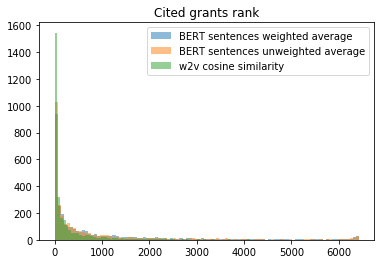

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking_weighted, alpha=0.5, bins=100, label="BERT sentences weighted average")
plt.hist(ranking_unweighted, alpha=0.5, bins=100, label="BERT sentences unweighted average")
plt.hist(ranking_naive_w2v, alpha=0.5, bins=100, label="w2v cosine similarity")
plt.title("Cited grants rank")
plt.legend()
plt.show()

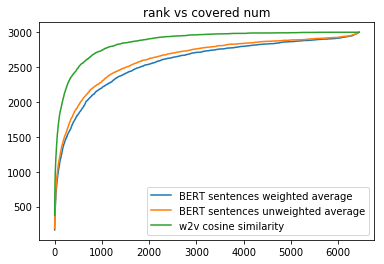

In [0]:
plt.plot(range(len(grants)), positive_counts_weighted, label="BERT sentences weighted average")
plt.plot(range(len(grants)), positive_counts_unweighted, label="BERT sentences unweighted average")
plt.plot(range(len(grants)), positive_counts_naive_w2v, label="w2v cosine similarity")
plt.title("rank vs covered num")
plt.legend()
plt.show()

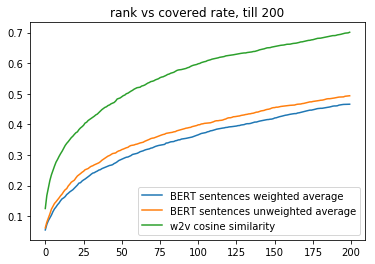

In [0]:
plt.plot(range(200), (np.array(positive_counts_weighted)/len(ranking_weighted))[0:200], label="BERT sentences weighted average")
plt.plot(range(200), (np.array(positive_counts_unweighted)/len(ranking_unweighted))[0:200], label="BERT sentences unweighted average")
plt.plot(range(200), (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[0:200], label="w2v cosine similarity")
plt.title("rank vs covered rate, till 200")
plt.legend()
plt.show()

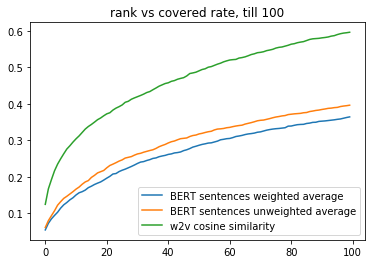

In [0]:
plt.plot(range(100), (np.array(positive_counts_weighted)/len(ranking_weighted))[0:100], label="BERT sentences weighted average")
plt.plot(range(100), (np.array(positive_counts_unweighted)/len(ranking_unweighted))[0:100], label="BERT sentences unweighted average")
plt.plot(range(100), (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[0:100], label="w2v cosine similarity")
plt.title("rank vs covered rate, till 100")
plt.legend()
plt.show()

In [0]:
print("BERT weighted top 10  : {}".format( (np.array(positive_counts_weighted)/len(ranking_weighted))[10]))
print("BERT weighted top 100 : {}".format( (np.array(positive_counts_weighted)/len(ranking_weighted))[100]))
print("BERT weighted top 200 : {}\n".format( (np.array(positive_counts_weighted)/len(ranking_weighted))[200]))
print("BERT unweighted top 10  : {}".format( (np.array(positive_counts_unweighted)/len(ranking_unweighted))[10]))
print("BERT unweighted top 100 : {}".format( (np.array(positive_counts_unweighted)/len(ranking_unweighted))[100]))
print("BERT unweighted top 200 : {}\n".format( (np.array(positive_counts_unweighted)/len(ranking_unweighted))[200]))
print("w2v top 10   : {}".format( (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[10]))
print("w2v top 100  : {}".format( (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[100]))
print("w2v top 200  : {}\n".format( (np.array(positive_counts_naive_w2v)/len(ranking_naive_w2v))[200]))

BERT weighted top 10  : 0.15066666666666667
BERT weighted top 100 : 0.366
BERT weighted top 200 : 0.4663333333333333

BERT unweighted top 10  : 0.16666666666666666
BERT unweighted top 100 : 0.39866666666666667
BERT unweighted top 200 : 0.49466666666666664

w2v top 10   : 0.30433333333333334
w2v top 100  : 0.5983333333333334
w2v top 200  : 0.7023333333333334



#Fine-tuned BERT

In [0]:
!gsutil ls gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000

gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/checkpoint
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval.tf_record
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval_results.txt
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/events.out.tfevents.1561187062.cb50ebb7add8
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/graph.pbtxt
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/model.ckpt-4951.data-00000-of-00001
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/model.ckpt-4951.index
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/model.ckpt-4951.meta
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/train.tf_record
gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval/


In [0]:
!gsutil cp -r gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000 ./bert/data/

Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/checkpoint...
Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval.tf_record...
/ [2 files][ 16.5 MiB/ 16.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval/events.out.tfevents.1561188266.cb50ebb7add8...
Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval/events.out.tfevents.1561190079.cb50ebb7add8...
Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/eval_results.txt...
Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/events.out.tfevents.1561187062.cb50ebb7add8...
Copying gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/graph.pbtxt...
Copying gs://ml

In [0]:
with gzip.open("./bert/data/test_grants_ids.pkl.gz", 'rb') as f:
     (test_ids, grants_ids) = pickle.load(f)
with gzip.open("./bert/data/training_app_ids.pkl.gz", 'rb') as f:
     training_ids = pickle.load(f)

In [0]:
import datetime
import json
import os
import pprint
import random
import string
import sys
import tensorflow as tf

assert 'COLAB_TPU_ADDR' in os.environ, 'ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!'
TPU_ADDRESS = 'grpc://' + os.environ['COLAB_TPU_ADDR']
print('TPU address is', TPU_ADDRESS)

with tf.Session(TPU_ADDRESS) as session:
  print('TPU devices:')
  pprint.pprint(session.list_devices())

  # Upload credentials to TPU.
  with open('/content/adc.json', 'r') as f:
    auth_info = json.load(f)
  tf.contrib.cloud.configure_gcs(session, credentials=auth_info)
  # Now credentials are set for all future sessions on this TPU.

TPU address is grpc://10.91.217.82:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 12880160087948122895),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 17881193554605741500),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 11357723634082602781),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 14846914957485567344),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 15632256880644036792),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 14139026555479045984),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 9326919319256763308),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 6702137317619491599),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 1638034911

In [0]:
import sys
sys.path.append("./bert")

In [0]:
!gsutil cp -r gs://mlstudy-phys/bert ./bert/data/

Copying gs://mlstudy-phys/bert/dev.tsv...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_config.json...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_model.ckpt.index...
/ [4 files][483.1 MiB/483.1 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/bert_model.ckpt.meta...
Copying gs://mlstudy-phys/bert/model/uncased_L-12_H-768_A-12/vocab.txt...
Copying gs://mlstudy-phys/bert/train.tsv...
- [7 files][547.8 MiB/547.8 MiB]                                                
Operation completed over 7 objects/547.8 MiB.                             

In [0]:
import tokenization

tokenizer = tokenization.FullTokenizer(
    vocab_file="./bert/data/bert/model/uncased_L-12_H-768_A-12/vocab.txt", do_lower_case=True)

In [0]:
CLS_ID = tokenizer.vocab["[CLS]"]
SEP_ID = tokenizer.vocab["[SEP]"]

max_seq_length = 512

In [0]:
def convert_single_sentence(ids_a_input, uniqueue_id):
  ids_a = ids_a_input
  # Account for [CLS] and [SEP] with "- 2"
  if len(ids_a_input) > max_seq_length - 2:
    ids_a = list(ids_a_input)[0:(max_seq_length - 2)]  
      

  # The convention in BERT is:
  # (b) For single sequences:
  #  tokens:   [CLS] the dog is hairy . [SEP]
  #  type_ids: 0     0   0   0  0     0 0
  #
  # Where "type_ids" are used to indicate whether this is the first
  # sequence or the second sequence. The embedding vectors for `type=0` and
  # `type=1` were learned during pre-training and are added to the wordpiece
  # embedding vector (and position vector). This is not *strictly* necessary
  # since the [SEP] token unambiguously separates the sequences, but it makes
  # it easier for the model to learn the concept of sequences.
  #
  # For classification tasks, the first vector (corresponding to [CLS]) is
  # used as as the "sentence vector". Note that this only makes sense because
  # the entire model is fine-tuned.
  input_ids = []
  segment_ids = []
  input_ids.append(CLS_ID)
  segment_ids.append(0)
  for token in ids_a:
    input_ids.append(token)
    segment_ids.append(0)
  input_ids.append(SEP_ID)
  segment_ids.append(0)

  # The mask has 1 for real tokens and 0 for padding tokens. Only real
  # tokens are attended to.
  input_mask = [1] * len(input_ids)

  # Zero-pad up to the sequence length.
  while len(input_ids) < max_seq_length:
    input_ids.append(0)
    input_mask.append(0)
    segment_ids.append(0)

  assert len(input_ids) == max_seq_length
  assert len(input_mask) == max_seq_length
  assert len(segment_ids) == max_seq_length

  return (input_ids, input_mask, segment_ids, uniqueue_id)

In [0]:

BASE_TRAINING=10000
BASE_TEST = 20000
BASE_GRANTS = 30000


# unique_id, tokens, input_ids, input_mask, input_type_ids
def feature_tuplist_to_feature_dict(ftups):
    dic = {}
    dic['input_ids'] = [tup[0] for tup in ftups]
    dic["input_mask"] = [tup[1] for tup in ftups]
    dic["input_type_ids"] = [tup[2] for tup in ftups]
    dic['unique_ids'] = [tup[3] for tup in ftups]
    return dic

In [0]:
import modeling

from extract_features  import model_fn_builder

In [0]:
bert_config = modeling.BertConfig.from_json_file("./bert/data/bert/model/uncased_L-12_H-768_A-12/bert_config.json")

In [0]:
BUCKET = 'mlstudy-phys' #@param {type:"string"}
OUTPUT_DIR = 'gs://{}/mlstudy-phys/bert/model/patent_3000'.format(BUCKET)

INIT_CHECK_POINT_FILE='model.ckpt-4951' #@param {type:"string"}
INIT_CHECK_POINT = '{}/{}'.format(OUTPUT_DIR, INIT_CHECK_POINT_FILE)

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))
print('***** Init checkpoint: {} *****'.format(INIT_CHECK_POINT))

***** Model output directory: gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000 *****
***** Init checkpoint: gs://mlstudy-phys/mlstudy-phys/bert/model/patent_3000/model.ckpt-4951 *****


In [0]:
class FLAGS(object):
    '''Parameters.'''
    def __init__(self):
        self.vocab_file = "./bert/model/patent/vocab.txt"
        self.use_tpu = True
        self.output_dir = OUTPUT_DIR
        # self.data_dir = "./bert/data/1000"
        self.init_checkpoint = INIT_CHECK_POINT
        self.predict_batch_size = 16
        # TPU related
        self.num_tpu_cores = 8
        self.tpu_name = TPU_ADDRESS
        
        # following parameters are not used anymore. (because we create feature by hand)
        self.do_lower_case = True
        self.max_seq_length = 512
        
        # The following parameters are not used in predictions.
        # Just use to create RunConfig.
        self.master = None
        self.save_checkpoints_steps = 1
        self.learning_rate = 0
        self.num_warmup_steps = 0
        self.num_train_steps = 0
        # TPU related. Some of these value have positive int not to make TPUEstimator angry (even though these are not used...).
        self.eval_batch_size = 32
        self.train_batch_size = 32 
        self.iterations_per_loop = 1000

        
FLAGS = FLAGS()

In [0]:
tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu=FLAGS.tpu_name)

is_per_host = tf.contrib.tpu.InputPipelineConfig.PER_HOST_V2

run_config = tf.contrib.tpu.RunConfig(
    cluster=tpu_cluster_resolver,
    master=FLAGS.master,
    model_dir=FLAGS.output_dir,
    save_checkpoints_steps=FLAGS.save_checkpoints_steps,
    tpu_config=tf.contrib.tpu.TPUConfig(
        iterations_per_loop=FLAGS.iterations_per_loop,
        num_shards=FLAGS.num_tpu_cores,
        per_host_input_for_training=is_per_host))

In [0]:
model_fn = model_fn_builder(
    bert_config=bert_config,
    init_checkpoint=FLAGS.init_checkpoint,
    use_tpu=FLAGS.use_tpu,
    layer_indexes=[-2], # Use second last hidden layer
    use_one_hot_embeddings=FLAGS.use_tpu)

In [0]:
# https://github.com/kyzhouhzau/BERT-NER/issues/19

def model_fn_wrapper(features, labels, mode, params):
  tspec = model_fn(features, labels, mode, params)
  # We use second last layer!
  pred_dict = {'predictions': tspec.predictions['layer_output_0']}
  return tf.contrib.tpu.TPUEstimatorSpec(
          mode=tspec.mode, predictions=pred_dict, scaffold_fn=tspec.scaffold_fn)

In [0]:
estimator = tf.contrib.tpu.TPUEstimator(
    use_tpu=FLAGS.use_tpu,
    # model_fn=model_fn,
    model_fn=model_fn_wrapper,
    config=run_config,
    train_batch_size=FLAGS.train_batch_size,
    eval_batch_size=FLAGS.eval_batch_size,
    predict_batch_size=FLAGS.predict_batch_size)

W0807 12:54:19.427534 140077897680768 estimator.py:1984] Estimator's model_fn (<function model_fn_wrapper at 0x7f660444ae18>) includes params argument, but params are not passed to Estimator.


In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [0]:
training_app_input_fdict = feature_tuplist_to_feature_dict([convert_single_sentence(one_app, BASE_TRAINING+idx) for idx, one_app in enumerate(training_ids)])

In [0]:
def ids_to_input_fdict(ids, base_id):
  return feature_tuplist_to_feature_dict([convert_single_sentence(one_app, base_id+idx) for idx, one_app in enumerate(ids)])

def fdict_to_features(fdict):

  def _batch_input_function(params):
    test_ds = tf.data.Dataset.from_tensor_slices(fdict)    
    return test_ds.batch(params['batch_size'])

  feature_results =  np.empty((0,768), float)
  print(datetime.datetime.today())
  result = estimator.predict(_batch_input_function, yield_single_examples=True)
  
  for idx, one in enumerate(result):
    # reduce mean.
    mask = fdict["input_mask"][idx]
    validlen = sum(mask)
    features = one['predictions'].reshape(512, 768).sum(axis=0)/validlen
    
    feature_results = np.append(feature_results, features.reshape(1,768), axis=0 )  
  print(datetime.datetime.today())
  return feature_results

In [0]:
import numpy as np
import pandas as pd

train_features = fdict_to_features(training_app_input_fdict)

2019-08-07 12:55:31.665009
2019-08-07 12:57:08.398957


In [0]:
test_app_input_fdict = ids_to_input_fdict(test_ids, BASE_TEST)

In [0]:
test_app_features = fdict_to_features(test_app_input_fdict)

2019-08-07 12:57:09.006043
2019-08-07 12:58:14.384050


In [0]:
grants_input_fdict = ids_to_input_fdict(grants_ids, BASE_GRANTS)

In [0]:
grants_features = fdict_to_features(grants_input_fdict)

2019-08-07 12:58:15.614164
2019-08-07 13:00:41.307586


In [0]:
train_features.shape, test_app_features.shape, grants_features.shape

((3000, 768), (3000, 768), (6440, 768))

In [0]:
GS_BASE="gs://mlstudy-phys/data"
TRAIN_FEATURE_FNAME="training_app_3000_fine_tuned_BERT_features_seclasmean.pkl.gz"
TEST_FEATURE_FNAME="test_app_3000_fine_tuned_BERT_features_seclasmean.pkl.gz"
GRANTS_FEATURE_FNAME="grants_3000_3000_fine_tuned_BERT_features_seclasmean.pkl.gz"

In [0]:
with gzip.open(TRAIN_FEATURE_FNAME, 'w') as f:
     pickle.dump(train_features, f)
    
with gzip.open(TEST_FEATURE_FNAME, 'w') as f:
     pickle.dump(test_app_features, f)
    
with gzip.open(GRANTS_FEATURE_FNAME, 'w') as f:
     pickle.dump(grants_features, f)

In [0]:
!gsutil cp {TRAIN_FEATURE_FNAME} {GS_BASE}/{TRAIN_FEATURE_FNAME}
!gsutil cp {TEST_FEATURE_FNAME} {GS_BASE}/{TEST_FEATURE_FNAME}
!gsutil cp {GRANTS_FEATURE_FNAME} {GS_BASE}/{GRANTS_FEATURE_FNAME}

Copying file://training_app_3000_fine_tuned_BERT_features_seclasmean.pkl.gz [Content-Type=application/octet-stream]...
/ [1 files][  9.4 MiB/  9.4 MiB]                                                
Operation completed over 1 objects/9.4 MiB.                                      
Copying file://test_app_3000_fine_tuned_BERT_features_seclasmean.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/9.4 MiB.                                      
Copying file://grants_3000_3000_fine_tuned_BERT_features_seclasmean.pkl.gz [Content-Type=application/octet-stream]...
-
Operation completed over 1 objects/20.1 MiB.                                     


analysis

In [0]:
%%time

sim_fine_tuned = []

for test_f in test_app_features:
  temp = []
  
  for grant_f in grants_features:
    sim = np.dot(test_f, grant_f) / (np.linalg.norm(test_f) * np.linalg.norm(grant_f))
    temp.append(sim)
    
  sim_fine_tuned.append(temp)

CPU times: user 3min 57s, sys: 833 ms, total: 3min 57s
Wall time: 3min 58s


In [0]:
!gsutil cp gs://mlstudy-phys/data/citations_info_3000+3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/testset_app_3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/grants_for_3000+3000.df.gz ./
!gsutil cp gs://mlstudy-phys/data/training_app_3000.df.gz ./  

Copying gs://mlstudy-phys/data/citations_info_3000+3000.df.gz...
/ [1 files][506.5 KiB/506.5 KiB]                                                
Operation completed over 1 objects/506.5 KiB.                                    
Copying gs://mlstudy-phys/data/testset_app_3000.df.gz...
/ [1 files][ 45.5 MiB/ 45.5 MiB]                                                
Operation completed over 1 objects/45.5 MiB.                                     
Copying gs://mlstudy-phys/data/grants_for_3000+3000.df.gz...
/ [1 files][129.4 MiB/129.4 MiB]                                                
Operation completed over 1 objects/129.4 MiB.                                    
Copying gs://mlstudy-phys/data/training_app_3000.df.gz...
- [1 files][ 45.0 MiB/ 45.0 MiB]                                                
Operation completed over 1 objects/45.0 MiB.                                     


In [0]:
citations_info_target = pd.read_pickle("./citations_info_3000+3000.df.gz")
test_app = pd.read_pickle("./testset_app_3000.df.gz")
grants = pd.read_pickle("./grants_for_3000+3000.df.gz")
train_app = pd.read_pickle("./training_app_3000.df.gz")

In [0]:
citations = citations_info_target[citations_info_target["action_type"] == 102]
cite_app = citations["app_id"]
cite_grant = citations ["parsed"]
cite_relation = pd.concat([cite_app, cite_grant], axis=1)

In [0]:
def test_label(app_id, grant, cite_relation):
  cited_parsed = cite_relation[cite_relation["app_id"] == app_id]["parsed"]
  return [ 1 if parsed == cited_parsed.values[0] else 0 for parsed in grant["parsed"] ]

In [0]:
%%time

ranking = []

for num in range(len(sim_fine_tuned)):

  app_id = test_app["app_id"][num]
  label = pd.Series(test_label(app_id, grants, cite_relation))
    
  i, = np.where(label == 1)
  cited_index = i[0]
  rank = sorted(sim_fine_tuned[num], reverse=True).index(sim_fine_tuned[num][cited_index])
  ranking.append(rank)

CPU times: user 41.4 s, sys: 113 ms, total: 41.5 s
Wall time: 41.5 s


In [0]:
%%time

ranking_arr = np.array(ranking)

positive_counts = [sum(ranking_arr <= thrd) for thrd in range(len(grants))]

CPU times: user 40.8 s, sys: 13.1 ms, total: 40.8 s
Wall time: 40.9 s


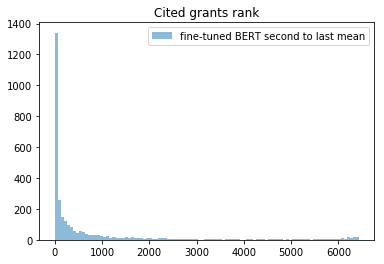

In [0]:
import matplotlib.pyplot as plt

plt.hist(ranking, alpha=0.5, bins=100, label="fine-tuned BERT second to last mean")
plt.title("Cited grants rank")
plt.legend()
plt.show()

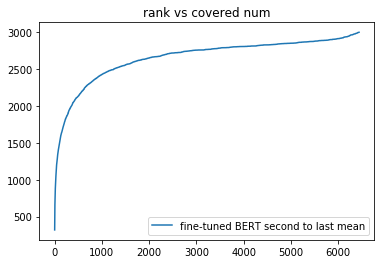

In [0]:
plt.plot(range(len(grants)), positive_counts, label="fine-tuned BERT second to last mean")
plt.title("rank vs covered num")
plt.legend()
plt.show()

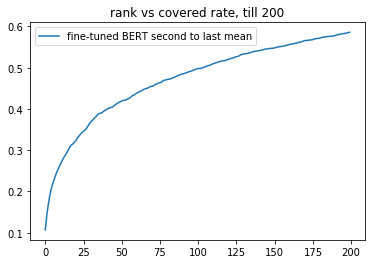

In [0]:
plt.plot(range(200), (np.array(positive_counts)/len(ranking))[0:200], label="fine-tuned BERT second to last mean")
plt.title("rank vs covered rate, till 200")
plt.legend()
plt.show()

In [0]:
print("fine-tuned BERT second to last mean top 10  : {}".format( (np.array(positive_counts)/len(ranking))[10]))
print("fine-tuned BERT second to last mean top 100 : {}".format( (np.array(positive_counts)/len(ranking))[100]))
print("fine-tuned BERT second to last mean top 200 : {}\n".format( (np.array(positive_counts)/len(ranking))[200]))

fine-tuned BERT second to last mean top 10  : 0.267
fine-tuned BERT second to last mean top 100 : 0.498
fine-tuned BERT second to last mean top 200 : 0.587

